### Assignment 0: Calculating expected unique numbers

#### Derivation of Formula:

**Task**: Generate n random integers between 0 and N. Calculate unique numbers.


**Intuition**:
Assume we have a bin filled with N+1 balls. Each ball has a number on it from 0 to N. Drawing balls with replacement from the bin simulates the same task. 

We can introduce a binary variable for calculation of unique values.

$I_{j}=\left\{\begin{array}{ll}1 & \text { if } j\text {'th } \text { ball is ever drawn } \\ 0 & \text { otherwise }\end{array}\right.$



Now unique numbers equals;

$X=\sum_{j=0}^{N} I_{j}$



The expectation of unique values will be;

$\mathbb{E}[X]=\mathbb{E}\left[\sum_{j=0}^{N} I_{j}\right]=\sum_{j=0}^{N} \mathbb{E}\left[I_{j}\right]$

$\mathbb{E}\left[I_{j}\right]=P\left(I_{j}=1\right)=$ Probabity of being drawn of $j$'th ball

$\mathbb{E}\left[I_{j}\right]=1$ - Probabilty of being never drawn of $j$'th ball.

$\mathbb{E}\left[I_{j}\right]=1-\left(\frac{N}{N+1}\right)^{n}$
 

$\mathbb{E}[X]=(N+1) \cdot\left[1-\left(\frac{N}{N+1}\right)^{n}\right]$


$\left(\frac{N}{N+1}\right)^{n}=\left(1-\frac{1}{N+1}\right)^{n}=\left(1-\frac{1}{(N+1)}\right)^{\frac{(N+1) n}{(N+1)}} \approx e^{\frac{-n}{N+1}}$

$\mathbb{E}[X] \approx(N+1) \cdot\left[1-e^{\frac{-n}{N+1}}\right]$

#### Experiments

In [12]:
import numpy as np

In [75]:
seeds = np.unique(np.random.randint(0, high=1000000, size=10000))
np.random.shuffle(seeds)

seeds = seeds[:10]
seeds

array([419586, 915209, 121553, 386001, 990989,  41858, 943298, 497036,
        71985, 384688])

In [105]:
kk = 10 # Number of experiments per seed
nn = [1000, 10000, 100000] # number of random integers

In [111]:
result_dict = {}
results = []

for seed in seeds:
    np.random.seed(seed)
    for n in nn:
        for N in [n, 2*n, 4*n, 8*n, 16*n, 32*n, 64*n]:
            for k in range(kk):
                num_unique = len(np.unique(np.random.randint(0, high=N, size=n)))
                
                result_dict['seed'] = seed
                result_dict['k'] = k
                result_dict['n'] = n
                result_dict['N'] = N
                result_dict['num'] = num_unique
                
                result_dict['Expected'] = (N+1)*(1 - (N/(N+1))**n)
                result_dict['Approximated'] = (N+1)*(1 - np.e**(-n/(N+1)))
                
                results.append(result_dict.copy())

In [140]:
import pandas as pd

df = pd.DataFrame(results)


df['err_Expected'] = (np.absolute(df['num'] - df['Expected']))
df['err_Approximated'] = (np.absolute(df['num'] - df['Approximated']))

df.head(10)

,seed,k,n,N,num,Expected,Approximated,err_Expected,err_Approximated
0,419586,0,1000,1000,626,632.568632,632.384616,6.568632,6.384616
1,419586,1,1000,1000,635,632.568632,632.384616,2.431368,2.615384
2,419586,2,1000,1000,625,632.568632,632.384616,7.568632,7.384616
3,419586,3,1000,1000,627,632.568632,632.384616,5.568632,5.384616
4,419586,4,1000,1000,627,632.568632,632.384616,5.568632,5.384616
5,419586,5,1000,1000,620,632.568632,632.384616,12.568632,12.384616
6,419586,6,1000,1000,643,632.568632,632.384616,10.431368,10.615384
7,419586,7,1000,1000,642,632.568632,632.384616,9.431368,9.615384
8,419586,8,1000,1000,615,632.568632,632.384616,17.568632,17.384616
9,419586,9,1000,1000,650,632.568632,632.384616,17.431368,17.615384


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seed              2100 non-null   int64  
 1   k                 2100 non-null   int64  
 2   n                 2100 non-null   int64  
 3   N                 2100 non-null   int64  
 4   num               2100 non-null   int64  
 5   Expected          2100 non-null   float64
 6   Approximated      2100 non-null   float64
 7   err_Expected      2100 non-null   float64
 8   err_Approximated  2100 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 147.8 KB


In [142]:
df_avg = df.groupby(['seed', 'n', 'N']).mean().drop(['k'], axis=1)
df_avg

num      Expected  Approximated  err_Expected  \
seed   n      N                                                            
41858  1000   1000       632.5    632.568632    632.384616     10.300000   
              2000       788.9    787.180483    787.028847      7.500000   
              4000       885.6    884.920707    884.823361      5.400000   
              8000       936.2    940.087124    940.031969      8.600000   
              16000      970.5    969.422225    969.392868      6.900000   
...                        ...           ...           ...           ...   
990989 100000 400000   88491.5  88479.810620  88479.713270     52.737876   
              800000   93972.1  94002.540282  94002.485123     61.608056   
              1600000  96933.0  96939.130732  96939.101372     45.573854   
              3200000  98427.1  98453.665281  98453.650154     38.899169   
              6400000  99235.7  99222.811002  99222.803286     22.413399   

                       err_Approximated  
seed   n      N                          
41858  1000   1000            10.300000  
              2000             7.500000  
              4000             5.400000  
              8000             8.600000  
              16000            6.900000  
...                                 ...  
990989 100000 400000          52.757346  
              800000          61.597025  
              1600000         45.579726  
              3200000         38.890092  
              6400000         22.418028  

[210 rows x 5 columns]

In [143]:
import matplotlib.pyplot as plt

In [150]:
df_avg2 = df_avg.groupby(['n', 'N']).mean()
df_avg2

num      Expected  Approximated  err_Expected  \
n      N                                                             
1000   1000       633.03    632.568632    632.384616      8.293137   
       2000       788.38    787.180483    787.028847      8.960000   
       4000       884.56    884.920707    884.823361      6.521586   
       8000       940.32    940.087124    940.031969      5.760000   
       16000      968.59    969.422225    969.392868      4.786000   
       32000      984.32    984.552119    984.536975      3.120000   
       64000      992.27    992.235844    992.228152      2.315849   
10000  10000     6320.86   6321.653758   6321.469811     19.986925   
       20000     7869.36   7869.628639   7869.477006     26.745146   
       40000     8845.96   8848.092525   8847.995176     24.901851   
       80000     9396.43   9400.310140   9400.254984     16.981014   
       160000    9694.27   9693.941180   9693.911823     13.875882   
       320000    9844.11   9845.380590   9845.365446      9.917612   
       640000    9925.37   9922.288128   9922.280437      7.126612   
100000 100000   63213.68  63212.504062  63212.320122     72.829756   
       200000   78706.74  78694.109894  78693.958261     89.331208   
       400000   88493.23  88479.810620  88479.713270     73.492726   
       800000   94001.54  94002.540282  94002.485123     56.181611   
       1600000  96941.96  96939.130732  96939.101372     40.737385   
       3200000  98447.30  98453.665281  98453.650154     27.739834   
       6400000  99223.81  99222.811002  99222.803286     20.841340   

                err_Approximated  
n      N                          
1000   1000             8.311538  
       2000             8.960000  
       4000             6.523533  
       8000             5.760000  
       16000            4.780716  
       32000            3.120000  
       64000            2.316311  
10000  10000           19.990604  
       20000           26.739080  
       40000           24.899904  
       80000           16.975498  
       160000          13.878818  
       320000           9.917309  
       640000           7.128304  
100000 100000          72.840793  
       200000          89.344174  
       400000          73.504408  
       800000          56.179405  
       1600000         40.737973  
       3200000         27.738018  
       6400000         20.841803

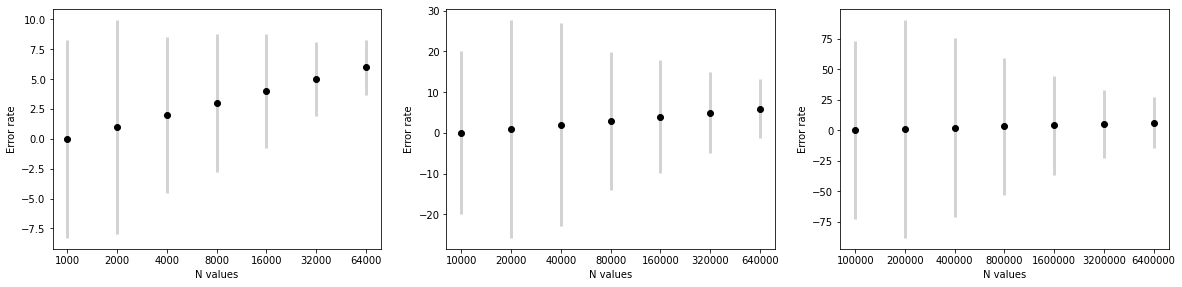

In [201]:
plt.figure(figsize=(20,15))

df1 = df_avg2.loc[1000]
plt.subplot(3,3,1)
plt.xticks(np.arange(len(df1)), df1.index.values)
plt.xlabel("N values")
plt.ylabel("Error rate")
plt.errorbar(np.arange(len(df1)), np.arange(len(df1)), yerr=df1['err_Expected'], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);



df2 = df_avg2.loc[10000]
plt.subplot(3,3,2)
plt.xticks(np.arange(len(df2)), df2.index.values)
plt.xlabel("N values")
plt.ylabel("Error rate")
plt.errorbar(np.arange(len(df2)), np.arange(len(df2)), yerr=df2['err_Expected'], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

df3 = df_avg2.loc[100000]
plt.subplot(3,3,3)
plt.xticks(np.arange(len(df3)), df3.index.values)
plt.xlabel("N values")
plt.ylabel("Error rate")
plt.errorbar(np.arange(len(df3)), np.arange(len(df3)), yerr=df3['err_Expected'], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);


### Conclusion

Experiments have been conducted 10 times per seed value. 10 seed value have been used during the experiments. 

Both formula and the approximation values are consistent with the results.
Table **df_avg** includes unique values, expected values and error rates. These are the average values of 10 independent runs.

Table **df_avg2** includes the average result of 10 different seed valued results. 

Error rates are increasing when the number of generated integers are increased. However, error rates decrease when broader range is used to generate integers.